# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Import Data Science Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Requests
import requests
import json
import time
from pprint import pprint

# Import the open weather app API Key
from api_keys import weather_api_key

# Import Citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200 ):
            city_weather = response.json()
            
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city = city_weather.get("name")
            city_country = city_weather.get('sys', {}).get('country')
            city_date = city_weather.get('dt')
            
            city_max_temp = city_weather.get('main', {}).get('temp_max')
            city_humidity = city_weather.get('main', {}).get('humidity')
            city_clouds = city_weather.get('clouds', {}).get('all')
            city_wind = city_weather.get('wind', {}).get('speed')


            city_lat = city_weather.get('coord', {}).get('lat')
            city_lng = city_weather.get('coord', {}).get('lon')
            
            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()            

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | acapulco de juarez
Processing Record 2 of Set 1 | constantia
Processing Record 3 of Set 1 | oualidia
City not found. Skipping...
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | martapura
Processing Record 7 of Set 1 | piacabucu
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | awjilah
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | afaahiti
Processing Record 15 of Set 1 | alotau
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | nadi
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | remire-montjoly
Processing Record 22 of Set 1 | kolonia
Processing

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [9]:
# Display sample data
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco de Juárez,16.8634,-99.8901,80.42,78,0,6.91,MX,1733103013
1,Constanța,44.1833,28.6500,39.88,74,100,17.94,RO,1733102904
2,Klyuchi,52.2667,79.1667,16.11,93,100,7.07,RU,1733103016
3,Fortuna,40.5982,-124.1573,49.12,83,0,4.61,US,1733103018
4,Martapura,-3.4167,114.8500,78.89,89,75,5.75,ID,1733103019
...,...,...,...,...,...,...,...,...,...
577,Pointe-Noire,-4.7761,11.8635,78.87,94,75,5.75,CG,1733103752
578,Mtambile,-5.3833,39.7000,78.24,78,81,2.21,TZ,1733103753
579,Aswān,24.0934,32.9070,58.30,41,0,4.61,EG,1733103754
580,El Abiodh Sidi Cheikh,32.8930,0.5484,55.26,54,99,3.58,DZ,1733103755


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Acapulco de Juárez,16.8634,-99.8901,80.42,78,0,6.91,MX,1733103013
1,Constanța,44.1833,28.6500,39.88,74,100,17.94,RO,1733102904
2,Klyuchi,52.2667,79.1667,16.11,93,100,7.07,RU,1733103016
3,Fortuna,40.5982,-124.1573,49.12,83,0,4.61,US,1733103018
4,Martapura,-3.4167,114.8500,78.89,89,75,5.75,ID,1733103019


In [12]:
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Acapulco de Juárez,16.8634,-99.8901,80.42,78,0,6.91,MX,2024-12-02 01:30:13
1,Constanța,44.1833,28.6500,39.88,74,100,17.94,RO,2024-12-02 01:28:24
2,Klyuchi,52.2667,79.1667,16.11,93,100,7.07,RU,2024-12-02 01:30:16
3,Fortuna,40.5982,-124.1573,49.12,83,0,4.61,US,2024-12-02 01:30:18
4,Martapura,-3.4167,114.8500,78.89,89,75,5.75,ID,2024-12-02 01:30:19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

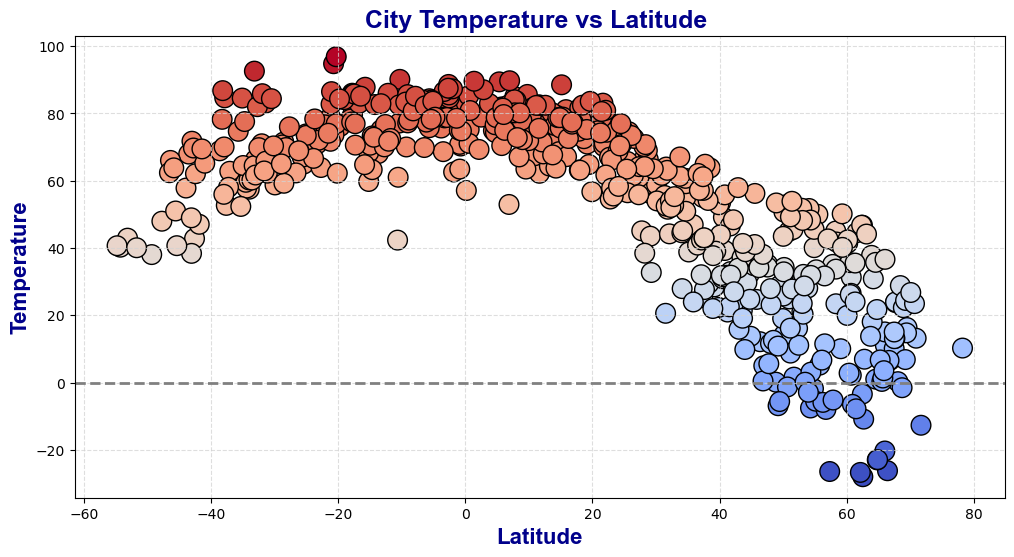

In [208]:
# Build scatter plot for latitude vs. temperature

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], c=city_data_df["Max Temp"], cmap="coolwarm", edgecolor="black", s=200)   

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Temperature", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Temperature vs Latitude  ", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

In [201]:
print(city_data_df["Humidity"].min())
print(city_data_df["Humidity"].max())


16
100


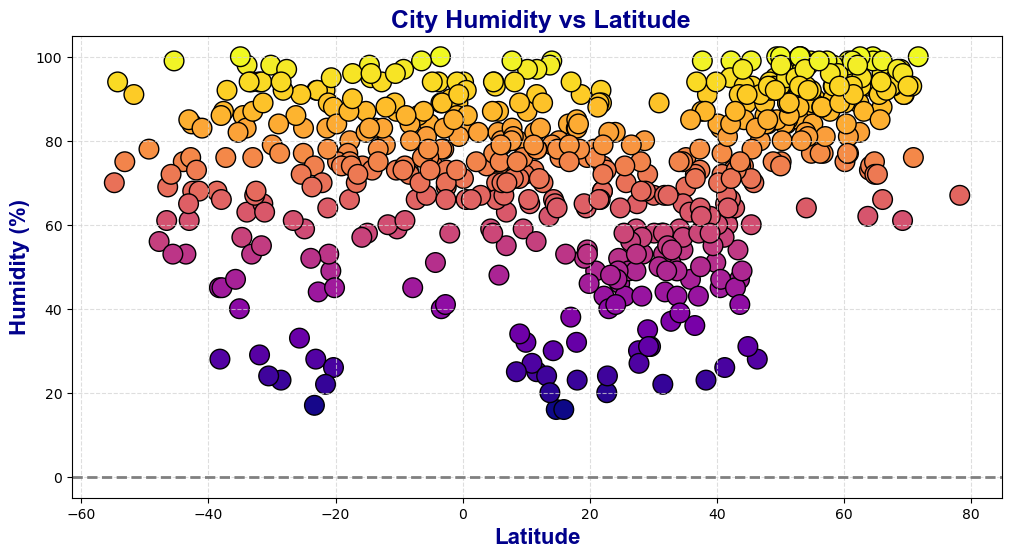

In [210]:
# Build scatter plot for latitude vs. Humidity

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c=city_data_df["Humidity"],cmap="plasma", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Humidity (%)", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Humidity vs Latitude", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

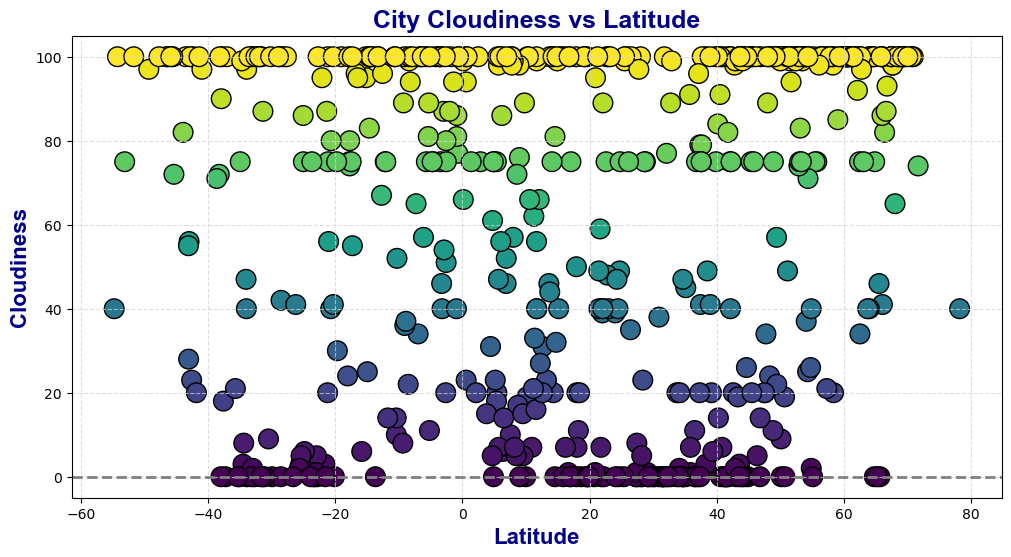

In [212]:
# Build the scatter plots for latitude vs. cloudiness
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"],cmap="viridis", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Cloudiness vs Latitude ", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [154]:
print(city_data_df["Wind Speed"].min())
print(city_data_df["Wind Speed"].max())

0.0
48.88


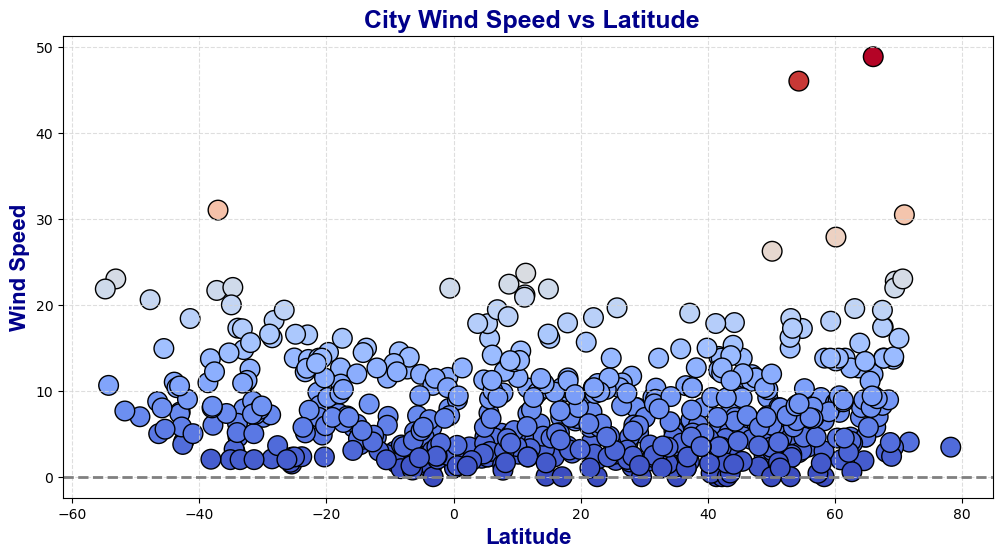

In [214]:
# Build the scatter plots for latitude vs. wind speed
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],c=city_data_df["Wind Speed"], cmap="coolwarm", edgecolor="black", s=200)

# Add Labels/Title
plt.xlabel("Latitude", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=16, fontweight="bold", color="darkblue")
plt.title(" City Wind Speed vs Latitude", fontweight="bold", fontsize=18, fontfamily="Arial", color="darkblue")

# Add a horizontal line at y=0 (for freezing point reference)
plt.axhline(0, color="grey", linewidth=2, linestyle="--")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [217]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    # do regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    r_squared = rvalue**2
    regress_values = x_values * slope + intercept # these are the points/predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"Correlation Coefficient (r): {rvalue}")
    print(f"R^2 Value: {r_squared}")
    print(f"Equation of the Line: {line_eq}")
    # Change Canvas Size
    plt.figure(figsize=(12, 6))
    
    # Create a basic plot
    plt.scatter(x_values, y_values, color="#DB5461", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=6) # the regression line

    # Add Labels/Title
    plt.xlabel(x_label, fontfamily="Arial", fontsize=14)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=14)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=18, fontfamily="Arial")
    
    # Add in a background grid
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    # Annotate
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    # Show/Save the Graph
    plt.show()

In [219]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,Acapulco de Juárez,16.8634,-99.8901,80.42,78,0,6.91,MX,2024-12-02 01:30:13,26.900000
1,Constanța,44.1833,28.6500,39.88,74,100,17.94,RO,2024-12-02 01:28:24,4.377778
2,Klyuchi,52.2667,79.1667,16.11,93,100,7.07,RU,2024-12-02 01:30:16,-8.827778
3,Fortuna,40.5982,-124.1573,49.12,83,0,4.61,US,2024-12-02 01:30:18,9.511111
4,Awjilah,29.1081,21.2869,56.17,72,1,5.10,LY,2024-12-02 01:30:23,13.427778


In [221]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,Martapura,-3.4167,114.8500,78.89,89,75,5.75,ID,2024-12-02 01:30:19,26.050000
1,Piaçabuçu,-10.4056,-36.4344,77.13,87,10,11.48,BR,2024-12-02 01:30:20,25.072222
2,Puerto Ayora,-0.7393,-90.3518,70.30,89,77,7.94,EC,2024-12-02 01:30:21,21.277778
3,Grytviken,-54.2811,-36.5092,40.23,94,100,10.63,GS,2024-12-02 01:30:27,4.572222
4,Afaahiti,-17.7500,-149.2833,79.59,80,80,12.44,PF,2024-12-02 01:30:29,26.438889


###  Temperature vs. Latitude Linear Regression Plot

Correlation Coefficient (r): -0.8559454127112213
R^2 Value: 0.7326425495413829
Equation of the Line: y = -1.2x + 89.57


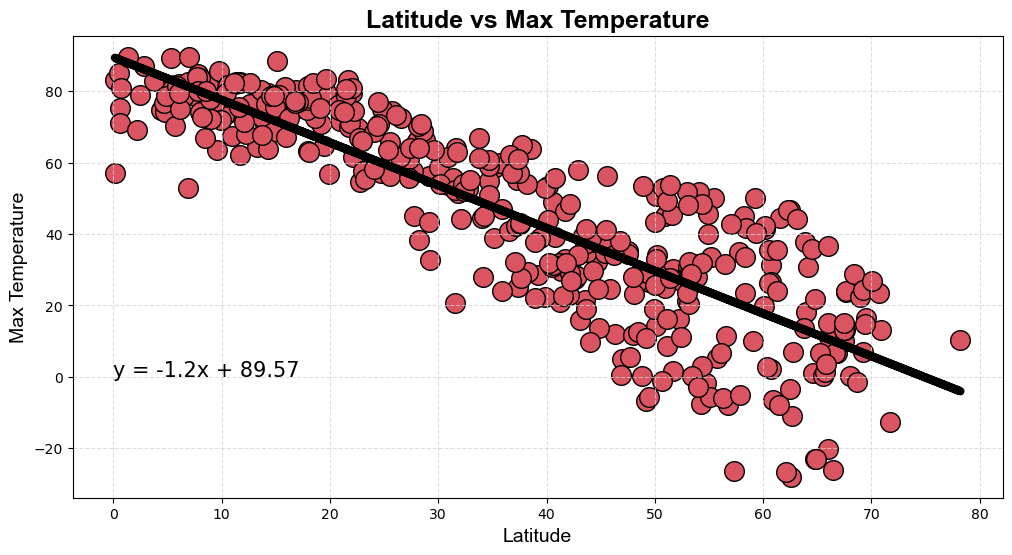

In [166]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (0, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)


# Convert temperature from Fahrenheit to Celsius
northern_hemi_df['Max Temp (C)'] = (northern_hemi_df['Max Temp'] - 32) * 5 / 9

# Assign new y_values (temperature in Celsius)
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp (C)"]  # Use the Celsius column
x_label = "Latitude"
y_label = "Max Temperature (°C)"  # Update the label to show Celsius
annotation = (0, 0)

# Call the function with updated data
do_regression_plot(x_values, y_values, x_label, y_label, annotation)



Correlation Coefficient (r): 0.6201391807722084
R^2 Value: 0.3845726035288258
Equation of the Line: y = 0.53x + 83.44


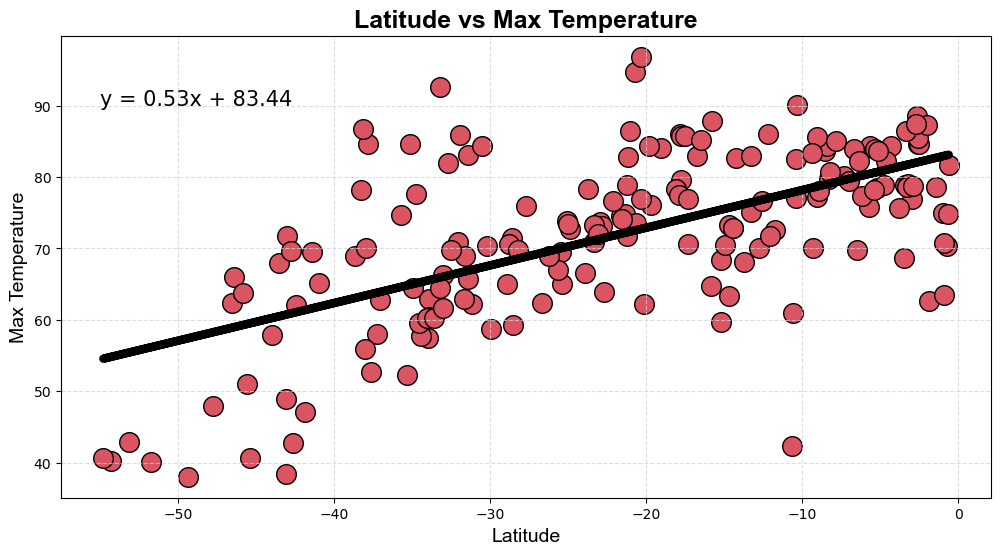

In [168]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-55,90)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

### Humidity vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.3983243894998013
R^2 Value: 0.15866231927038943
Equation of the Line: y = 0.4x + 59.97


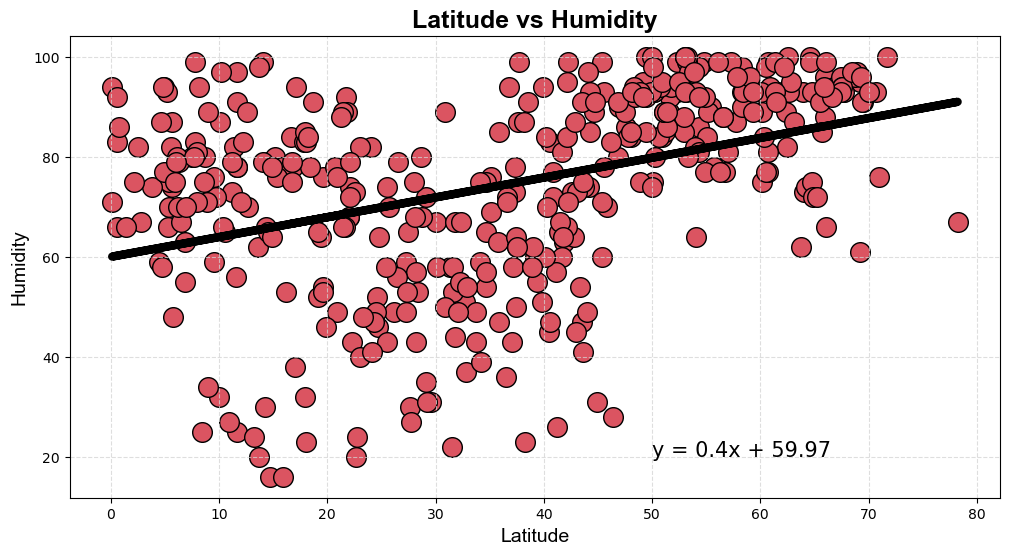

In [171]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (50,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): 0.12764595160433323
R^2 Value: 0.01629348896097578
Equation of the Line: y = 0.16x + 77.56


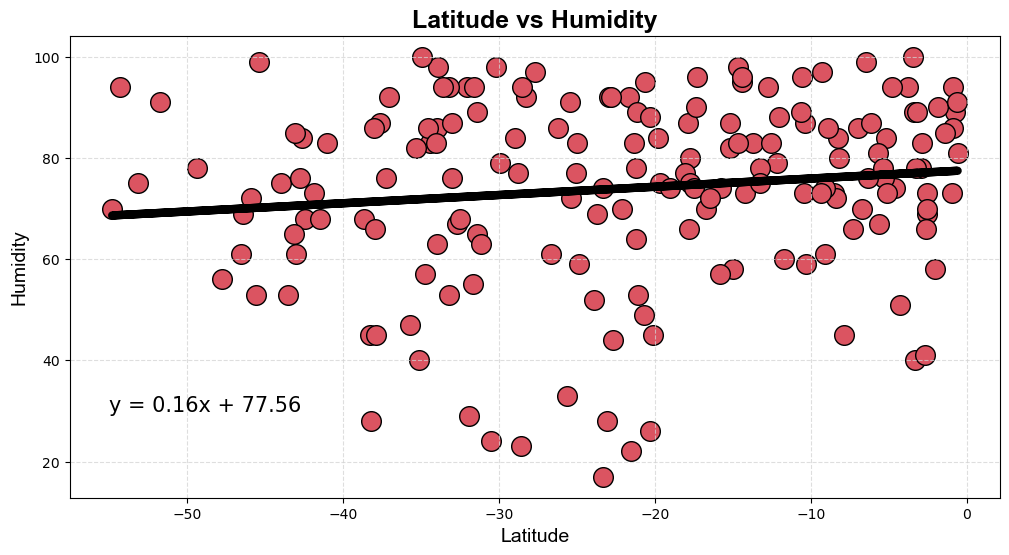

In [173]:
 # Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-55,30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

### Cloudiness vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.30324892627386857
R^2 Value: 0.09195991128625418
Equation of the Line: y = 0.63x + 35.72


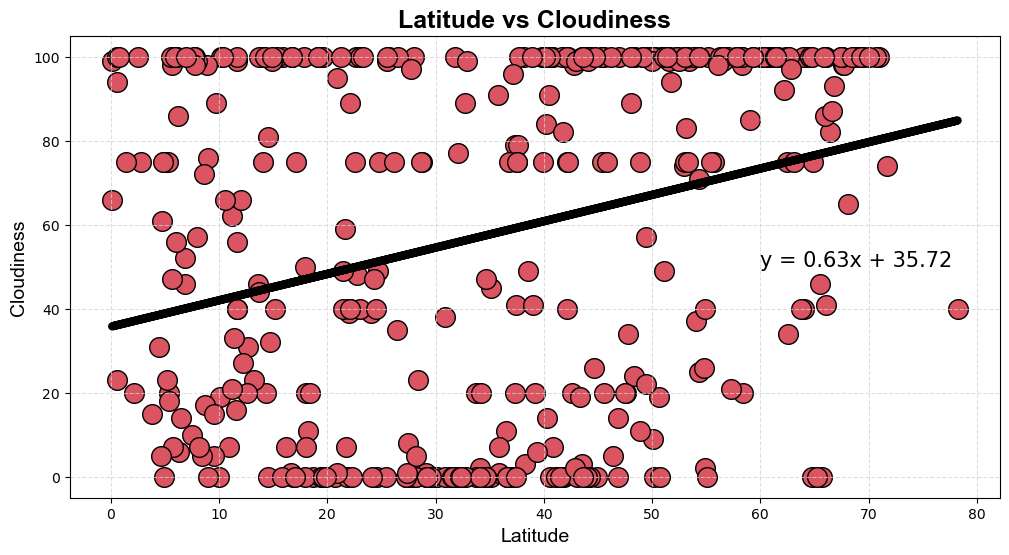

In [176]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (60,50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): 0.10364057418894228
R^2 Value: 0.010741368618213648
Equation of the Line: y = 0.28x + 69.73


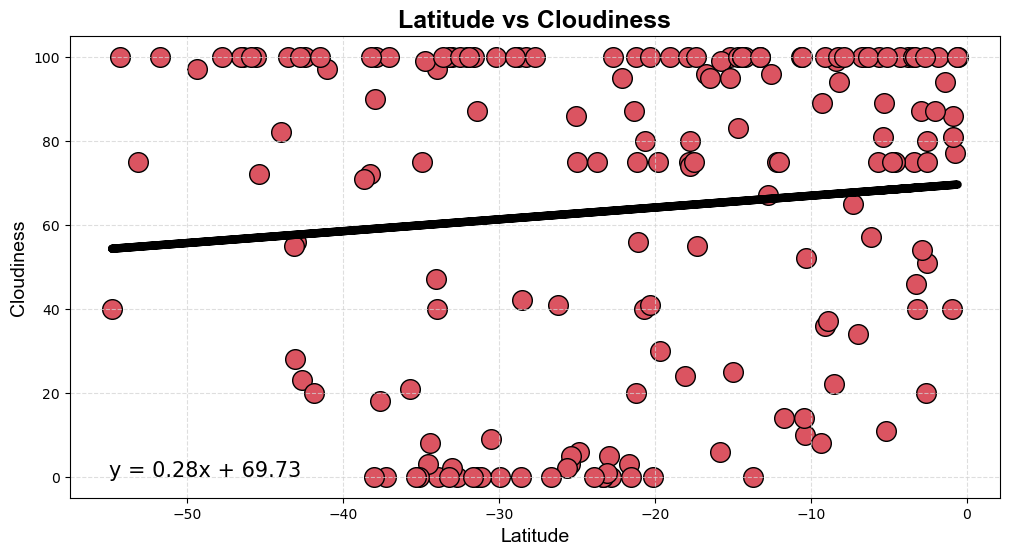

In [177]:
 # Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-55,0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

### Wind Speed vs. Latitude Linear Regression Plot

Correlation Coefficient (r): 0.12713057068451783
R^2 Value: 0.016162182002571183
Equation of the Line: y = 0.04x + 6.27


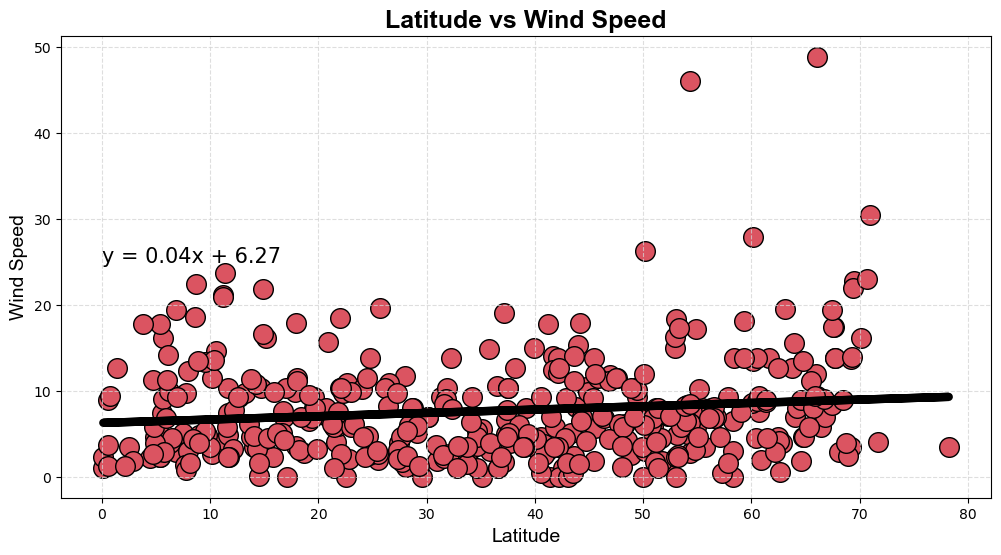

In [181]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (0,25)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

Correlation Coefficient (r): -0.3298237702930207
R^2 Value: 0.10878371945030327
Equation of the Line: y = -0.13x + 5.47


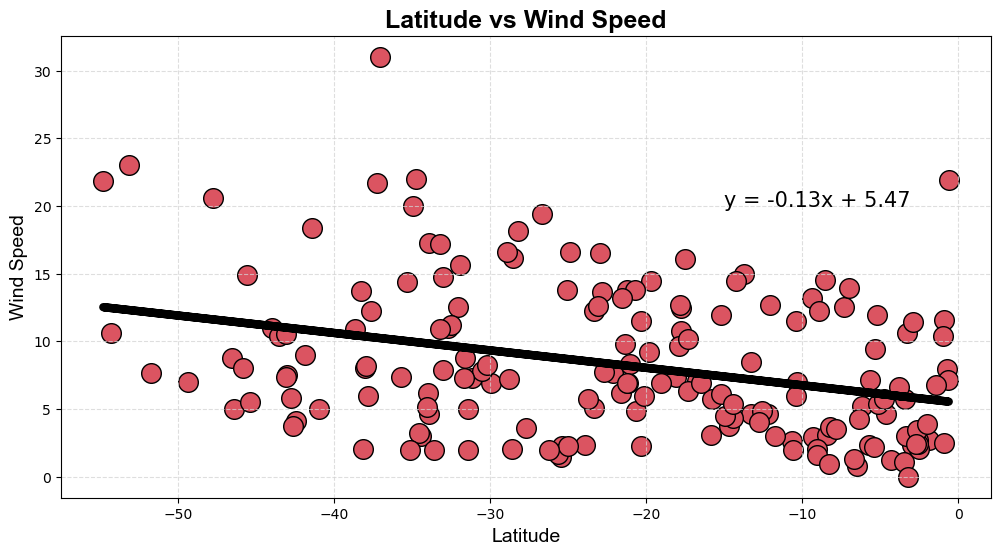

In [183]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-15,20)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:**  Both the Northern and Southern Hemisphere data show weak negative relationships between latitude and wind speed with the Southern Hemisphere showing a slightly stronger negative correlation.Both models have very low R2 values, indicating that the regression lines do not explain much of the variance in Wind Speed with the latitude.The negative slopes indicate a slight negative relationship between wind speed and latitude but this effect is very weak.